# Energy Spectrum

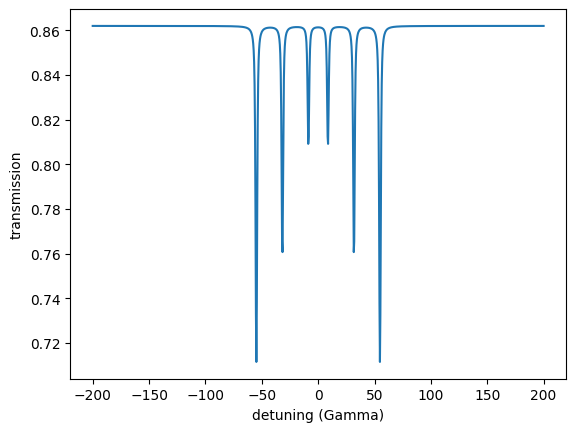

In [1]:
import nexus as nx
import numpy as np
import matplotlib.pyplot as plt

iron = nx.Material.Template(nx.lib.material.Fe)

layer_Fe = nx.Layer(id = "Fe layer",
                    material = iron,
                    thickness = 3000)

site = nx.Hyperfine(magnetic_field = 33,
                    isotropic = True)

iron.hyperfine_sites = [site]

sample = nx.Sample(layers = [layer_Fe])

beam = nx.Beam(polarization = 0)

exp = nx.Experiment(beam = beam,
                    objects = [sample],
                    isotope = nx.lib.moessbauer.Fe57)

detuning = np.linspace(-200, 200, 1001)

energy_spectrum = nx.EnergySpectrum(experiment = exp,
                                    detuning = detuning,
                                    electronic = True,
                                    scaling = "auto",
                                    background = 0,
                                    resolution = 1,
                                    distribution_points = 1,
                                    fit_weight = 1,
                                    kernel_type = "Gauss",
                                    residual = None,
                                    id = "my energy spectrum")

#%prun intensity = energy_spectrum.Calculate()
intensity = energy_spectrum.Calculate()

plt.plot(detuning, intensity)
plt.xlabel('detuning (Gamma)')
plt.ylabel('transmission')
plt.show()

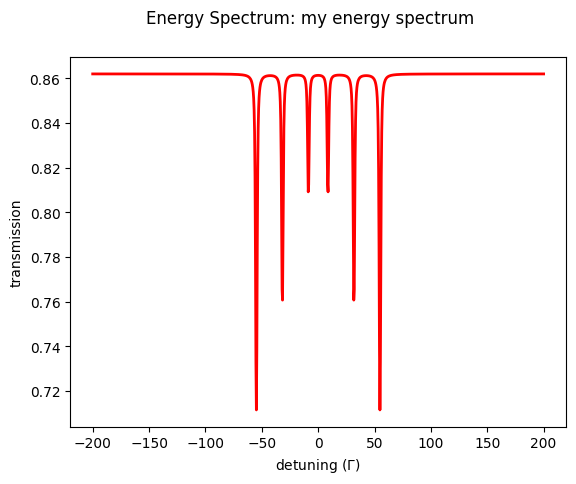

In [2]:
energy_spectrum.Plot()